In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
#import matplotlib.patches as mpatches #https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
import matplotlib.lines as mlines     # https://stackoverflow.com/questions/47391702/matplotlib-making-a-colored-markers-legend-from-scratch


from scipy.special import lpmn, lpmv

In [2]:
ħ, m = 1, 1

def K1(E):         # k1 function
    return np.sqrt(2*m*E / ħ)

def K2(k1, R):     # k2 function
    return k1*((1-np.sqrt(R))/(1+np.sqrt(R)))

def V0(E, k2):     # V_0 function
    return E - (ħ*k2)**2/(2*m)

In [3]:
fmt = '{:<1} {:<8} {:<12} {:<12} {:<8}'
print(fmt.format('', 'i', 'R', 'V', 'E'))     # for printing later in this cell
print('__________________________________________')


scatter = os.path.join(os.sep, 'C:', 'scat.txt')#'c:', 'kamyar', 'scat.txt')
scatter = np.loadtxt(scatter)
E = scatter[:, 0]
R = scatter[:, 1]

k1 = []     # initialize k1
V = []      # initialize V
for ii in enumerate(E):
    i = ii[0]     # because why not
    k1.append( K1(E[i]) )
    V.append( V0(E[i], K2(k1[i], R[i])) )
    print(fmt.format('', i, R[i], '%0.5f' % V[i], E[i]))

  i        R            V            E       
__________________________________________
  0        1.0          1.80000      1.8     
  1        1.0          1.90000      1.9     
  2        1.0          2.00000      2.0     
  3        0.52319      2.04587      2.1     
  4        0.399        2.08789      2.2     
  5        0.32312      2.12587      2.3     
  6        0.26961      2.15967      2.4     
  7        0.22912      2.18923      2.5     
  8        0.19713      2.21452      2.6     
  9        0.17113      2.23556      2.7     
  10       0.14956      2.25238      2.8     
  11       0.13139      2.26506      2.9     
  12       0.11591      2.27372      3.0     
  13       0.1026       2.27846      3.1     
  14       0.09107      2.27942      3.2     
  15       0.08103      2.27678      3.3     
  16       0.07224      2.27069      3.4     
  17       0.06451      2.26128      3.5     
  18       0.0577       2.24885      3.6     
  19       0.05167      2.23343      

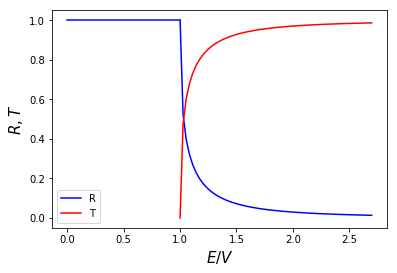

In [4]:
um = (0, 1)
ok = (1, 1)
# um and ok are obvious. use brain...

plt.plot(E/V, R, um, ok, color='blue')
plt.plot(E/V, 1-R, color='red')


plt.xlabel(r'$E/V$', fontsize=15)
plt.ylabel(r"$R,T$", fontsize=15)

blue_line = mlines.Line2D([], [], color='blue',
                          markersize=10, label='R')
red_line = mlines.Line2D([], [], color='red',
                          markersize=10, label='T')
plt.legend(handles=[blue_line, red_line])
plt.show()     # ???matplotlib turn off axis numbers???

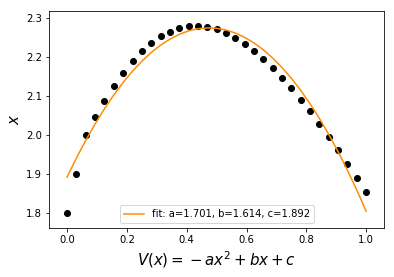

PARAMETERS:
   a = 1.701 ± 0.062
   b = 1.614 ± 0.064
   c = 1.614 ± 0.014


In [5]:
x = np.linspace(0, 1, len(V))
plt.scatter(x, V, color='black')


def func(x, a, b, c):
    return -a*x**2 + b*x + c
    
popt, pcov = curve_fit(func, x, V)
plt.plot(x, func(x, *popt), 'r-', label = 'fit: a=%.3f, b=%.3f, c=%.3f' % tuple(popt), color='darkorange')

plt.xlabel(r'$V(x)=-ax^2+bx+c$', fontsize=15) #change to just r"$V$"
plt.ylabel(r"$x$", fontsize=15)
plt.legend() #prop={'size': 10}, loc=8
plt.show()

print("PARAMETERS:")
print('   a =', '%.3f' % popt[0], '±', "%.3f" % pcov[0,0]**0.5) #THE 2ND HALF IS CODE FOR CALCULATING FIT UNCERTAINTY
print('   b =', "%0.3f" % popt[1], '±', "%.3f" % pcov[1,1]**0.5)
print('   c =', "%0.3f" % popt[1], '±', "%.3f" % pcov[2,2]**0.5)

<br>

print('It will cost $%d dollars.' % 95)
print('It will cost ${0} dollars.'.format(95))
print('%d days and %d nights.' % (40, 40))
print("'{0}' is longer than '{1}.'".format("Kam's dick", "Jack's dick"))

<br>

## Problem 2
### Part (b)

In [6]:
print(lpmn(2, 3, 0.8)[0])     #0:k row, l=0:l column

[[ 1.    0.8   0.46  0.08]
 [ 0.   -0.6  -1.44 -1.98]
 [ 0.    0.    1.08  4.32]]


<null>

In [7]:
l = 25                                 # order of problem marix as well as associated Legendre polynomial
yy = np.linspace(-.9999, .9999, 100000)     #range of y values -1 <= y <= +1 w/200 even spacing 

aLp_roots = []          # initialize [a]ssociated [L]egendre [p]olynomial [roots]
P_store = []            # initialize P_store matrix which stores P^l_k values
for k in range(l):      # 0 <= k <= l ... will delete [0] element later and a 25th element w/actual 25 index
    P_store.append([])  # P_store is now further initialized to have l rows
    for y in yy:
        P_store[k].append(lpmv(k+1, l, y))     # k, l, y (order, degree, arg)
    for i, P in enumerate(P_store[k]):         
        P_store[k][i] = abs(P)                 # makes finding 0s easier; otherwise messes up P_store... don't care
    aLp_roots.append(np.min(P_store))          # append the roots into aLp_roots

In [8]:
aLp_roots     #https://math.stackexchange.com/questions/616965/finite-element-method-for-the-particle-in-a-box-problem-in-quantum-mechanics

[8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 8.352401797750986e-05,
 2.7023065329536762e-05,
 3.6522263442702266e-06,
 4.1868539185430156e-07,
 3.9971555260842277e-08,
 3.0958934254989107e-09,
 1.870875670079063e-10,
 8.283254692715369e-12,
 2.391857131609107e-13,
 3.3828505138542234e-15]

In [9]:
l = 25                                 # order of problem marix as well as associated Legendre polynomial
yy = np.linspace(-.9, .9, 100000)     #range of y values -1 <= y <= +1 w/200 even spacing 

aLp_roots = []          # initialize [a]ssociated [L]egendre [p]olynomial [roots]
P_store = []            # initialize P_store matrix which stores P^l_k values
for k in range(l):      # 0 <= k <= l ... will delete [0] element later w/k+1 line below. Now actually have 1:25 dimension
    P_store.append([])  # P_store is now further initialized to have l rows
    for y in yy:
        P_store[k].append(lpmv(k+1, l, y))     # k, l, y (order, degree, arg)
    for i, P in enumerate(P_store[k]):         
        if -0.05 < P_store[k][i] < 0.05:                  
            #print(P_store[k][i])
            aLp_roots.append(yy[i])
print(len(aLp_roots))

748


In [10]:
print(np.min(P_store[20]))

-4.0844413478425246e+27


In [11]:
print(len(aLp_roots))
print('')
print(aLp_roots)

748

[-0.8666816668166681, -0.8666636666366664, -0.8666456664566646, -0.8666276662766628, -0.866609666096661, -0.8665916659166591, -0.8665736657366574, -0.8665556655566555, -0.8665376653766538, -0.866519665196652, -0.8665016650166502, -0.8664836648366484, -0.8664656646566465, -0.8664476644766448, -0.866429664296643, -0.8664116641166412, -0.8663936639366394, -0.8663756637566375, -0.8663576635766358, -0.7986949869498695, -0.7986769867698678, -0.7986589865898659, -0.7986409864098641, -0.7986229862298623, -0.7986049860498605, -0.7985869858698587, -0.7985689856898569, -0.7985509855098551, -0.7985329853298533, -0.7985149851498515, -0.7984969849698498, -0.7984789847898479, -0.7984609846098462, -0.7984429844298443, -0.7984249842498425, -0.7984069840698407, -0.7983889838898389, -0.7983709837098372, -0.7983529835298353, -0.7983349833498335, -0.7983169831698317, -0.7982989829898299, -0.7982809828098281, -0.7982629826298263, -0.7185941859418594, -0.7185761857618577, -0.7185581855818558, -0.7185401

In [12]:
m, mm = 25, 0
while m > 0:
    mm =  mm + (m)
    m -= 1
print(mm)

325


In [13]:
l = 25                                 # order of problem marix as well as associated Legendre polynomial
yy = np.linspace(-.9, .9, 100000)     #range of y values -1 <= y <= +1 w/200 even spacing 

aLp_roots = []          # initialize [a]ssociated [L]egendre [p]olynomial [roots]
P_store = []            # initialize P_store matrix which stores P^l_k values
for k in range(l):      # 0 <= k <= l ... will delete [0] element later w/k+1 line below. Now actually have 1:25 dimension
    P_store.append([])  # P_store is now further initialized to have l rows
    for y in yy:
        P_store[k].append(lpmv(k+1, l, y))     # k, l, y (order, degree, arg)
print(P_store)
        

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
>>> a = [2,4,5,2]
>>> min_value = min(a)
>>> [i for i, x in enumerate(a) if x == min_value]
[0, 3]

[0, 3]